In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Male')

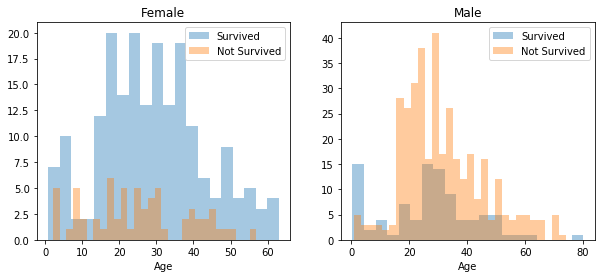

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax=sns.distplot(train[(train['Sex']=='female') & (train['Survived'] == 1)].Age.dropna(), label = 'survived',ax = axes[0],kde = False,bins=20)
ax=sns.distplot(train[(train['Sex']=='female') & (train['Survived'] == 0)].Age.dropna(), label = 'not survived',ax = axes[0],kde = False,bins=30)
ax.legend(labels=['Survived','Not Survived'])
ax.set_title('Female')

ax=sns.distplot(train[(train['Sex']=='male') & (train['Survived'] == 1)].Age.dropna(), label = 'survived',ax = axes[1],kde = False,bins = 20)
ax=sns.distplot(train[(train['Sex']=='male') & (train['Survived'] == 0)].Age.dropna(), label = 'not survived',ax = axes[1],kde = False,bins = 30)
ax.legend(labels=['Survived','Not Survived'])
ax.set_title('Male')


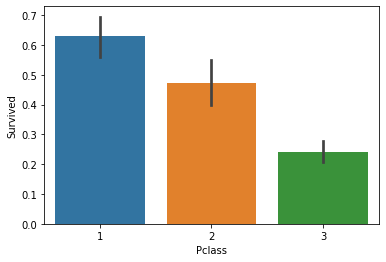

In [5]:
sns.barplot(x = 'Pclass',y='Survived',data=train)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


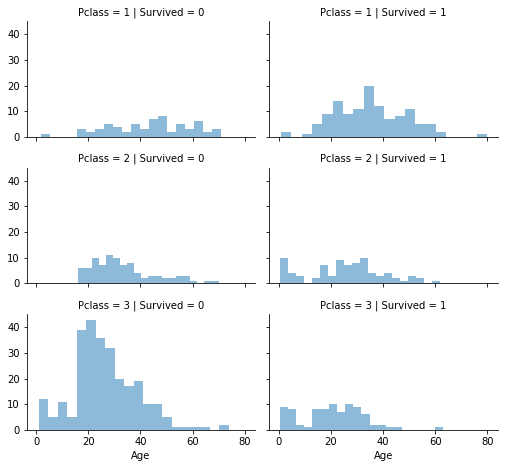

In [6]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


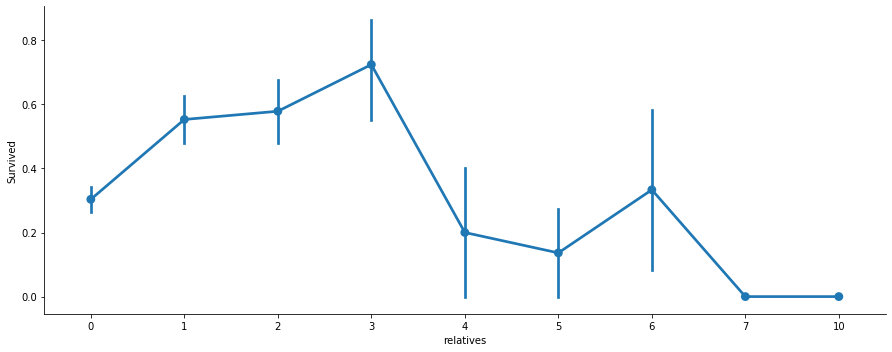

In [7]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', data=train, aspect = 2.5 )

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [13]:
X_train = train.iloc[:,[2,4,5,9]].values
y_train = train.iloc[:,1].values

In [15]:
X_train

array([[3, 'male', 22.0, 7.25],
       [1, 'female', 38.0, 71.2833],
       [3, 'female', 26.0, 7.925],
       ...,
       [3, 'female', nan, 23.45],
       [1, 'male', 26.0, 30.0],
       [3, 'male', 32.0, 7.75]], dtype=object)

In [17]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[:,[0,2,3]] = si.fit_transform(X_train[:,[0,2,3]])

In [20]:
from sklearn.preprocessing import LabelEncoder

X_train[:, 1] = LabelEncoder().fit_transform(X_train[:, 1])

In [24]:
from sklearn.preprocessing import StandardScaler

X_train[:,[2,3]] = StandardScaler().fit_transform(X_train[:,[2,3]])

In [25]:
X_train

array([[3.0, 1, -0.5657364610748746, -0.5024451714361923],
       [1.0, 0, 0.6638610320657843, 0.7868452935884461],
       [3.0, 0, -0.2583370877897099, -0.4888542575852486],
       ...,
       [3.0, 0, -0.10463740114712752, -0.17626323901354432],
       [1.0, 1, -0.2583370877897099, -0.04438103794142432],
       [3.0, 1, 0.20276197213803718, -0.49237782784290063]], dtype=object)

In [61]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='median')
X_test[:,[0,2,3]] = si.fit_transform(X_test[:,[0,2,3]])

In [63]:
from sklearn.preprocessing import LabelEncoder

X_test[:, 1] = LabelEncoder().fit_transform(X_test[:, 1])

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
X_test = test.iloc[:,[1,3,4,8]].values

In [44]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
X_test

array([[3.0, 1, 34.5, 7.8292],
       [3.0, 0, 47.0, 7.0],
       [2.0, 1, 62.0, 9.6875],
       ...,
       [3.0, 1, 38.5, 7.25],
       [3.0, 1, 27.0, 8.05],
       [3.0, 1, 27.0, 22.3583]], dtype=object)

In [48]:
from sklearn.preprocessing import StandardScaler

X_test[:,[2,3]] = StandardScaler().fit_transform(X_test[:,[2,3]])

In [49]:
X_test

array([[3.0, 1, 0.38623104829163113, -0.49741333194918286],
       [3.0, 0, 1.3713700413713346, -0.5122780073786185],
       [2.0, 1, 2.5535368330669788, -0.4641004685259794],
       ...,
       [3.0, 1, 0.7014755260771361, -0.5077963758574427],
       [3.0, 1, -0.2048523475561909, -0.4934551549896804],
       [3.0, 1, -0.2048523475561909, -0.23695704181192556]], dtype=object)

In [51]:
log_prediction = reg.predict(X_test)

In [56]:
acc_log = round(reg.score(X_train, y_train) * 100, 2)
print(acc_log)

79.91


# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rfc_pred = rfc.predict(X_test)
print(rfc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [60]:
acc_rfc = round(rfc.score(X_train,y_train)*100,2)
print(acc_rfc)

97.76


# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
dtc_pred = dtc.predict(X_test)
print(dtc_pred)

[0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [69]:
acc_dtc = round(dtc.score(X_train,y_train)*100,2)

print(acc_dtc)

97.76


# K Nearest Neighbors


In [71]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
knc_pred = knc.predict(X_test)
print(knc_pred)

[0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 0 1 0]


In [76]:
acc_knc = round(knc.score(X_train,y_train)*100,2)
print(acc_knc)

86.76


# Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [79]:
acc_gnb = round(gnb.score(X_train,y_train)*100,2)
acc_gnb

77.78

# SVC


In [82]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
svm_pred = svm.predict(X_test)

print(svm_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [86]:
acc_svc = round(svm.score(X_train,y_train)*100,2)

print(acc_svc)

80.02


# Best Model?

In [87]:
res = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knc, acc_log, 
              acc_rfc, acc_gnb, acc_dtc]})
res_df = res.sort_values(by='Score', ascending=False)
res_df = res_df.set_index('Score')
res_df.head(9)

,Model
Score,
97.76,Random Forest
97.76,Decision Tree
86.76,KNN
80.02,Support Vector Machines
79.91,Logistic Regression
77.78,Naive Bayes
